In [1]:
from azureml.core import Workspace, Dataset

subscription_id = 'bcfe0c62-8ebe-4df0-a46d-1efcf8739a5b'
resource_group = 'VChamp-Team3'
workspace_name = 'vchamp-team3'


# storage account : Algorithmia, Resource group: VChamp-Team3 and workspace: vchamp-team3.

workspace = Workspace(subscription_id, resource_group, workspace_name)

In [2]:
#['data_team3_synthetic_quality_check']
datastore = workspace.datastores['data_team3_synthetic_train']

In [3]:
dataset = Dataset.Tabular.from_delimited_files(path = [(datastore, 'demographics_event_train.csv')])

# preview the first 3 rows of the dataset
# dataset.to_pandas_dataframe()

In [4]:
demographic_event = dataset.to_pandas_dataframe()

In [5]:
type(demographic_event)

pandas.core.frame.DataFrame

##### Listing all the features of the "Demographic Event" file.
##### 
**Internalpatientid** - Unique internal patient ID.

**Age at update** - Age at update.

**Event date** - Date of the event.

**Marital status** - Marital status of the patient. ('Married', 'Separated', 'Unknown', 'Widowed', 'Never married', 'Divorced', 'Single', 'Not specified (no value)').

**Ruca category** - Rural category of the patient. ('Urban', 'Rural', 'Highly rural', 'Not specified').

In [7]:
demographic_event.head()

,Column1,Internalpatientid,Age at update,Event date,Marital status,Ruca category
0,1,100028,78.990830,2020-08-24 03:33:32,Married,Urban
1,2,100032,91.357622,2008-02-07 05:03:27,Married,Rural
2,4,100046,72.961415,2003-09-14 09:32:12,Married,Urban
3,5,100071,75.221222,2019-04-25 08:33:42,Widowed,Urban
4,6,100091,80.955929,2022-02-09 09:24:20,Never married,Urban


In [8]:
# shape of the dataframe
demographic_event.shape

(133252, 6)

**Removing the unnecessary column from the dataframe**

In [9]:
demographic_event = demographic_event.drop('Column1', axis = 1)
demographic_event.head()

,Internalpatientid,Age at update,Event date,Marital status,Ruca category
0,100028,78.990830,2020-08-24 03:33:32,Married,Urban
1,100032,91.357622,2008-02-07 05:03:27,Married,Rural
2,100046,72.961415,2003-09-14 09:32:12,Married,Urban
3,100071,75.221222,2019-04-25 08:33:42,Widowed,Urban
4,100091,80.955929,2022-02-09 09:24:20,Never married,Urban


In [10]:
demographic_event = demographic_event.drop('Event date', axis = 1)
demographic_event.head()

,Internalpatientid,Age at update,Marital status,Ruca category
0,100028,78.990830,Married,Urban
1,100032,91.357622,Married,Rural
2,100046,72.961415,Married,Urban
3,100071,75.221222,Widowed,Urban
4,100091,80.955929,Never married,Urban


In [12]:
# checking the null values
demographic_event.isnull().sum()

Internalpatientid    0
Age at update        0
Marital status       0
Ruca category        0
dtype: int64

**There are no null values in the dataframe**

In [13]:
# info of the dataframe
demographic_event.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133252 entries, 0 to 133251
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Internalpatientid  133252 non-null  int64  
 1   Age at update      133252 non-null  float64
 2   Marital status     133252 non-null  object 
 3   Ruca category      133252 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 4.1+ MB


In [14]:
# finding the number of unique values for each column
print(demographic_event.nunique())

Internalpatientid    133252
Age at update        133251
Marital status            8
Ruca category             4
dtype: int64


**General values for the age variable**

In [15]:

print(demographic_event['Age at update'].min())
print(demographic_event['Age at update'].max())
print(demographic_event['Age at update'].mean())
     

20.84202779044434
113.6155990968739
77.17008045257633


### **Univariate Analysis**

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### **1. Age**

## **Plot age distribution**

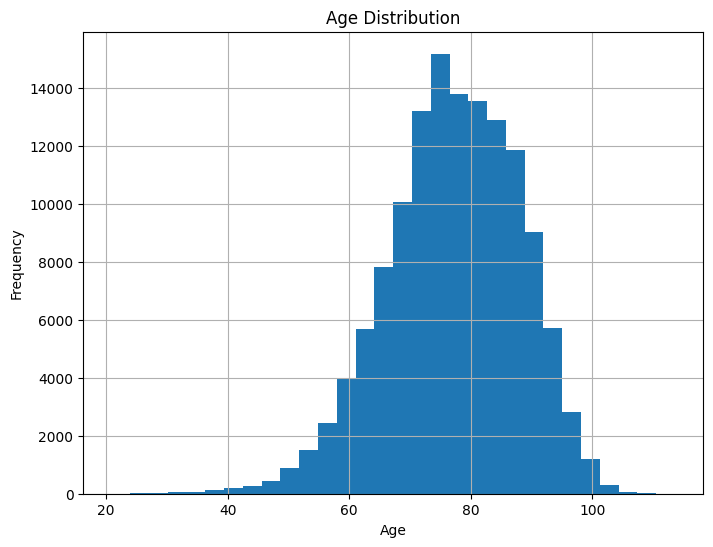

In [15]:

plt.figure(figsize=(8,6))
demographic_event['Age at update'].hist(bins = 30)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()
     

### **2.Marital Status**

In [16]:
# Value counts for the marital status
demographic_event['Marital status'].value_counts()
     

Marital status
Married                     73020
Divorced                    26856
Widowed                     19378
Never married                9352
Separated                    3708
Unknown                       534
Not specified (no value)      286
Single                        118
Name: count, dtype: int64

**In Marital status column we have -**

**Married** = 73020

**Divorced** = 26856

**Widowed** = 19378

**Never married** = 9352

**Separated** = 3708

**Unknown** = 534

**Not Specified** = 286

**Single** = 118

## **Plot marital status distribtution**

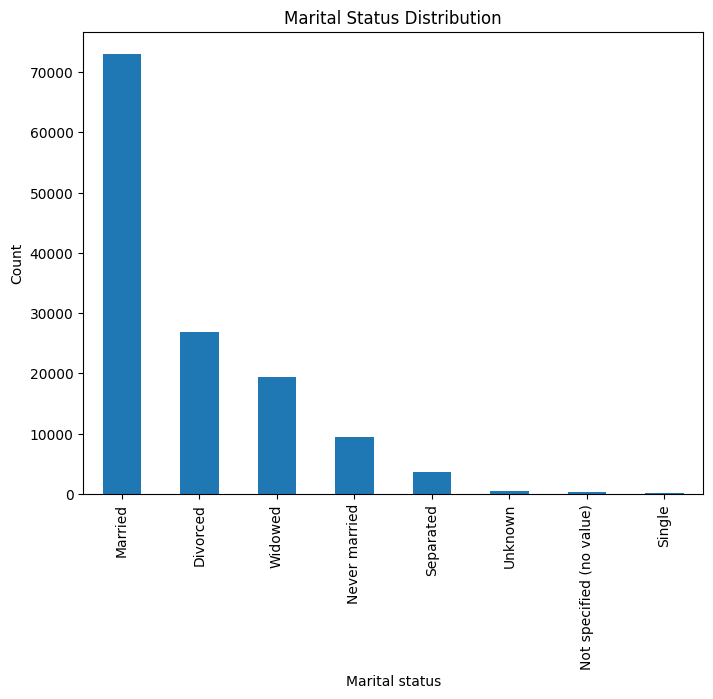

In [46]:
plt.figure(figsize=(8,6))
marital_counts = demographic_event['Marital status'].value_counts()
marital_counts.plot(kind = 'bar')
plt.xlabel('Marital status')
plt.ylabel('Count')
plt.title('Marital Status Distribution')
plt.show()

### **3.Ruca Category**

In [47]:
# Value counts for the demographic event
demographic_event['Ruca category'].value_counts()

Ruca category
Urban            84092
Rural            46614
Highly rural      2034
Not specified      512
Name: count, dtype: int64

**In Ruca Category we have - **

**Urban**        =    84092

**Rural **        =   46614

**Highly rural**    =  2034

**Not specified **   =  512




## **Plot rural category distribution**

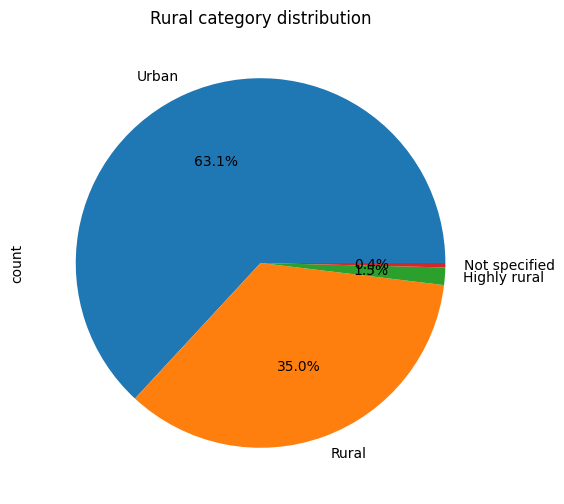

In [19]:
plt.figure(figsize=(8,6))
rural_counts = demographic_event['Ruca category'].value_counts()
rural_counts.plot(kind = 'pie', autopct = '%1.1f%%')
plt.title('Rural category distribution')
plt.show()

In [20]:
# checking the duplicated values
demographic_event.duplicated().sum()

0

In [21]:

# Selecting duplicate rows except first
# occurrence based on all columns
duplicate = demographic_event.duplicated('Internalpatientid')

In [22]:
# check for duplicated values in the Internalpatientid column

if duplicate.any():
  print("Duplicates found in the 'Internalpatientid' column")
else:
  print("No Duplicates found in the 'Internalpatientid' column")

No Duplicates found in the 'Internalpatientid' column


#### **Using the death file do to the Bivariate Analysis with the Demographic event train file**

In [23]:
dataset = Dataset.Tabular.from_delimited_files(path = [(datastore, 'death_train.csv')])

In [24]:
death_file = dataset.to_pandas_dataframe()

In [25]:
type(death_file)

pandas.core.frame.DataFrame

In [26]:
death_file.head()

,Column1,Internalpatientid,Age at death,Death date
0,0,100036,72.412770,2015-01-18 20:49:10
1,1,100037,75.241135,2008-10-16 15:14:26
2,2,100045,85.399403,2019-01-26 11:33:52
3,3,100095,84.136551,2004-08-10 21:49:35
4,6,10013,68.372126,2007-06-11 00:17:06


In [27]:
death_file = death_file.drop('Column1', axis = 1)
death_file.head()

,Internalpatientid,Age at death,Death date
0,100036,72.412770,2015-01-18 20:49:10
1,100037,75.241135,2008-10-16 15:14:26
2,100045,85.399403,2019-01-26 11:33:52
3,100095,84.136551,2004-08-10 21:49:35
4,10013,68.372126,2007-06-11 00:17:06


In [28]:
death_file.shape
     

(97284, 3)

In [29]:

death_file['death'] = 1
death_file.head()

,Internalpatientid,Age at death,Death date,death
0,100036,72.412770,2015-01-18 20:49:10,1
1,100037,75.241135,2008-10-16 15:14:26,1
2,100045,85.399403,2019-01-26 11:33:52,1
3,100095,84.136551,2004-08-10 21:49:35,1
4,10013,68.372126,2007-06-11 00:17:06,1


In [30]:
# merging the file with death file
merge_demographic_event_death= pd.merge(demographic_event, death_file, how='left',on='Internalpatientid')

In [31]:
merge_demographic_event_death.head()

,Internalpatientid,Age at update,Marital status,Ruca category,Age at death,Death date,death
0,100028,78.990830,Married,Urban,NaN,NaT,NaN
1,100032,91.357622,Married,Rural,91.375202,2008-02-13 15:16:17,1.0
2,100046,72.961415,Married,Urban,72.205323,2002-12-12 01:05:49,1.0
3,100071,75.221222,Widowed,Urban,NaN,NaT,NaN
4,100091,80.955929,Never married,Urban,NaN,NaT,NaN


In [32]:
merge_demographic_event_death.drop(['Age at death','Death date'],axis = 1, inplace = True)
merge_demographic_event_death.head()

,Internalpatientid,Age at update,Marital status,Ruca category,death
0,100028,78.990830,Married,Urban,NaN
1,100032,91.357622,Married,Rural,1.0
2,100046,72.961415,Married,Urban,1.0
3,100071,75.221222,Widowed,Urban,NaN
4,100091,80.955929,Never married,Urban,NaN


**Here we get our proper merged dataframe of "Demographic event" file and death file**

In [33]:
merge_demographic_event_death['death'] = merge_demographic_event_death['death'].fillna(0.0)
merge_demographic_event_death.head()

,Internalpatientid,Age at update,Marital status,Ruca category,death
0,100028,78.990830,Married,Urban,0.0
1,100032,91.357622,Married,Rural,1.0
2,100046,72.961415,Married,Urban,1.0
3,100071,75.221222,Widowed,Urban,0.0
4,100091,80.955929,Never married,Urban,0.0


In [34]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np



#### **Bivariate Analysis**

###### **1. Rural category & Death**

In [35]:
Rural_death_crosstab = pd.crosstab(merge_demographic_event_death['Ruca category'],merge_demographic_event_death['death'])
print(Rural_death_crosstab)

death            0.0    1.0
Ruca category              
Highly rural     497   1537
Not specified    281    231
Rural          12419  34195
Urban          22771  61321


In [36]:
#calculate the percentage within each Rural category

Rural_death_proportions = Rural_death_crosstab.div(Rural_death_crosstab.sum(axis = 1), axis = 0)*100

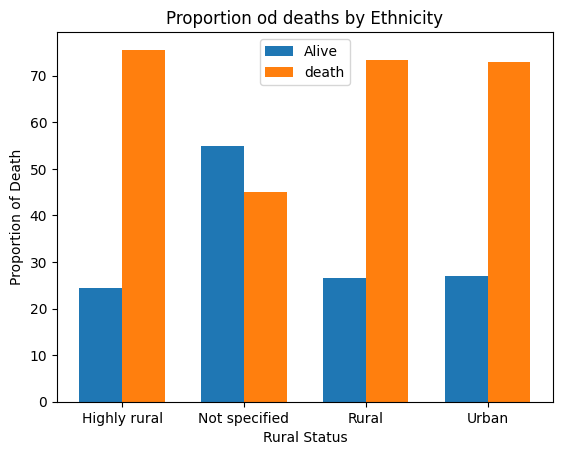

In [37]:

width = 0.35
x = range(len(Rural_death_proportions.index))

fig, ax = plt.subplots()

alive = ax.bar(x,Rural_death_proportions[0], width, label = 'Alive')
dead = ax.bar([i + width for i in x], Rural_death_proportions[1], width, label = "death")

ax.set_xlabel('Rural Status')
ax.set_ylabel('Proportion of Death')
ax.set_title('Proportion od deaths by Ethnicity')
ax.set_xticks([i + width/2 for i in x])
ax.set_xticklabels(Rural_death_proportions.index)
ax.legend()

plt.show()
     

###### **2. Marital Status & Death**

In [38]:
Marital_death_crosstab = pd.crosstab(merge_demographic_event_death['Marital status'],merge_demographic_event_death['death'])
print(Marital_death_crosstab)

death                       0.0    1.0
Marital status                        
Divorced                   8686  18170
Married                   19721  53299
Never married              3243   6109
Not specified (no value)     87    199
Separated                  1225   2483
Single                       30     88
Unknown                     193    341
Widowed                    2783  16595


In [39]:
#calculate the percentage within each Marital category

Marital_death_proportions = Marital_death_crosstab.div(Marital_death_crosstab.sum(axis = 1), axis = 0)*100

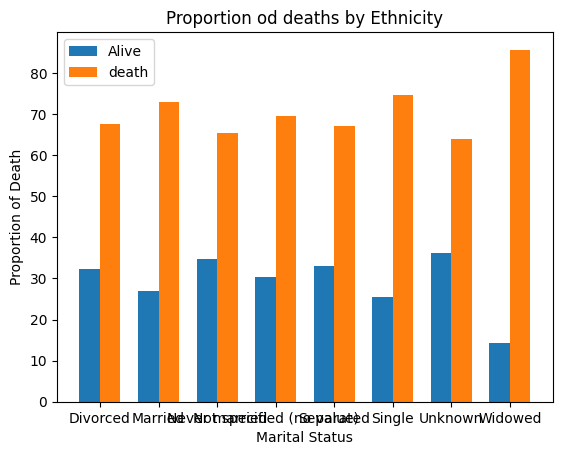

In [40]:
width = 0.35
x = range(len(Marital_death_proportions.index))

fig, ax = plt.subplots()

alive = ax.bar(x,Marital_death_proportions[0], width, label = 'Alive')
dead = ax.bar([i + width for i in x], Marital_death_proportions[1], width, label = "death")

ax.set_xlabel('Marital Status')
ax.set_ylabel('Proportion of Death')
ax.set_title('Proportion od deaths by Ethnicity')
ax.set_xticks([i + width/2 for i in x])
ax.set_xticklabels(Marital_death_proportions.index)
ax.legend()

plt.show()

### **Visualising the dead and alive patients from the dataframe**

In [41]:
merge_demographic_event_death['death'].value_counts()

death
1.0    97284
0.0    35968
Name: count, dtype: int64

In [42]:
merge_demographic_event_death['death'].value_counts(normalize=True)

death
1.0    0.730075
0.0    0.269925
Name: proportion, dtype: float64

**73% of the patients are dead and 26% are alive.**

<Axes: xlabel='death'>

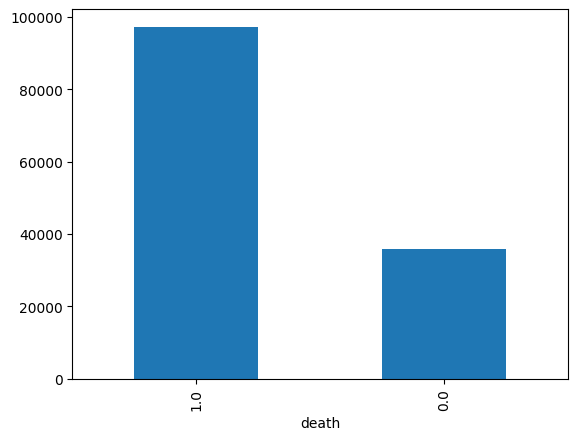

In [43]:
merge_demographic_event_death['death'].value_counts().plot(kind='bar')

#### **Checking the dataframes for the alive and death patients for the given merged files.**

In [44]:
df_alive = merge_demographic_event_death[merge_demographic_event_death["death"]==0]
df_alive

,Internalpatientid,Age at update,Marital status,Ruca category,death
0,100028,78.990830,Married,Urban,0.0
3,100071,75.221222,Widowed,Urban,0.0
4,100091,80.955929,Never married,Urban,0.0
10,100305,88.657099,Widowed,Urban,0.0
11,100371,74.463782,Married,Rural,0.0
...,...,...,...,...,...
133233,99676,49.532190,Divorced,Urban,0.0
133237,99762,70.689126,Divorced,Urban,0.0
133238,9977,76.527013,Married,Urban,0.0
133245,99875,61.094592,Married,Rural,0.0


### **35968 people are alive**

In [45]:
df_death =  merge_demographic_event_death[merge_demographic_event_death["death"]==1]
df_death

,Internalpatientid,Age at update,Marital status,Ruca category,death
1,100032,91.357622,Married,Rural,1.0
2,100046,72.961415,Married,Urban,1.0
5,100150,58.127857,Married,Urban,1.0
6,10018,88.516745,Widowed,Rural,1.0
7,100228,83.563322,Married,Urban,1.0
...,...,...,...,...,...
133246,9988,92.781791,Married,Rural,1.0
133247,99898,92.376313,Married,Urban,1.0
133248,9995,79.974938,Married,Rural,1.0
133249,99950,77.154395,Married,Urban,1.0


### **97284 people are dead**